In [1]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# bp - blood pressure
# sg - specific gravity
# al - albumin
# su - sugar
# rbc - red blood cells
# pc - pus cell
# pcc - pus cell clumps
# ba - bacteria
# bgr - blood glucose random
# bu - blood urea
# sc - serum creatinine
# sod - sodium
# pot - potassium
# hemo - hemoglobin
# pcv - packed cell volume
# wc - white blood cell count
# rc - red blood cell count
# htn - hypertension
# dm - diabetes mellitus
# cad - coronary artery disease
# appet - appetite
# pe - pedal edema
# ane - anemia
# Class - Class

df = pd.read_excel("C:/Users/91801/Desktop/Retail_shop/Multiple Disease Prediction/dataset/kidney_disease.xlsx")
df.drop_duplicates()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
#descriptive analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [5]:
df.describe(include="object")

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,248,335,396,396,330,295,270.0,398,398,398,399,399,399,400
unique,2,2,2,2,43,90,46.0,2,2,2,2,2,2,2
top,normal,normal,notpresent,notpresent,41,9800,5.2,no,no,no,good,no,no,ckd
freq,201,259,354,374,21,11,18.0,251,261,364,317,323,339,250


In [6]:
#change the data type and nan values

df = df.dropna(subset=["rc"])
df = df[df["rc"] != "?"]
df["rc"] = df["rc"].astype(float)

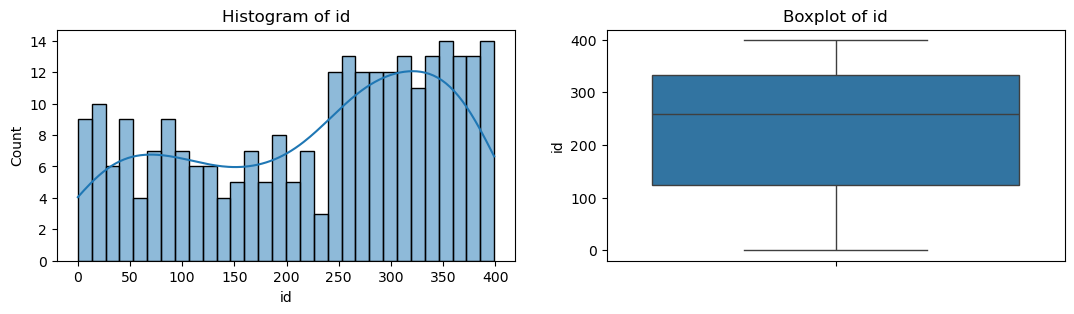

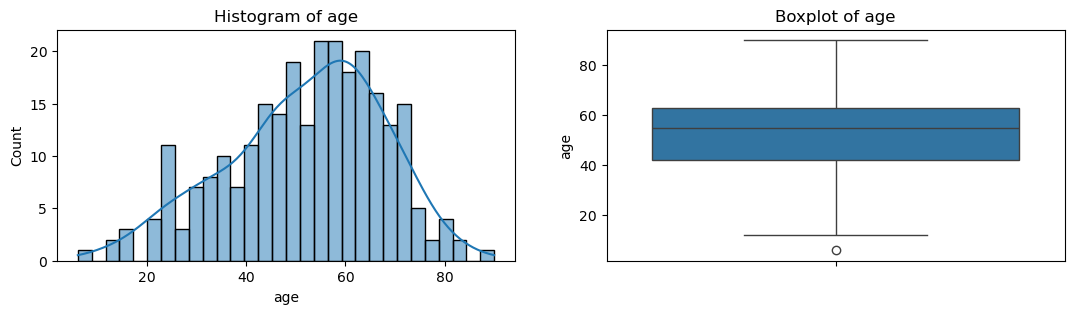

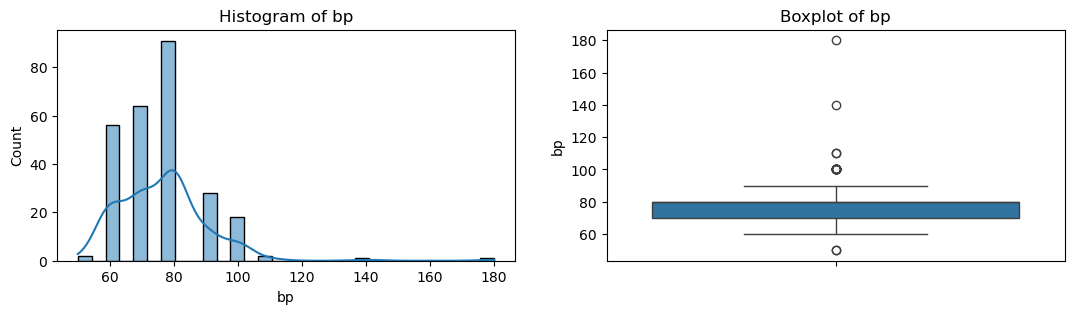

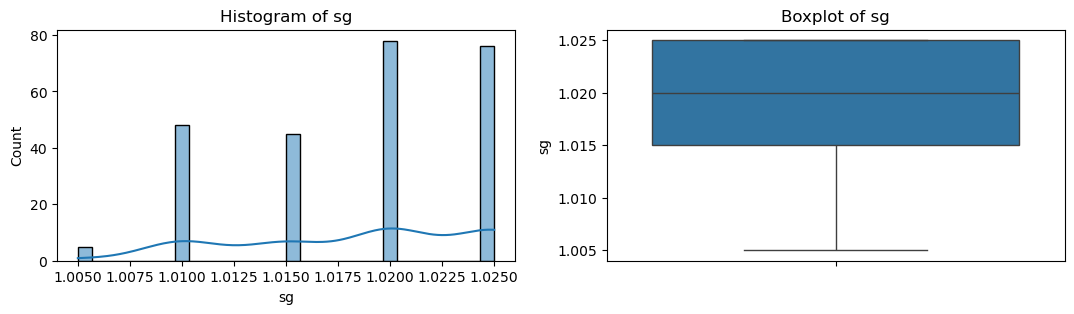

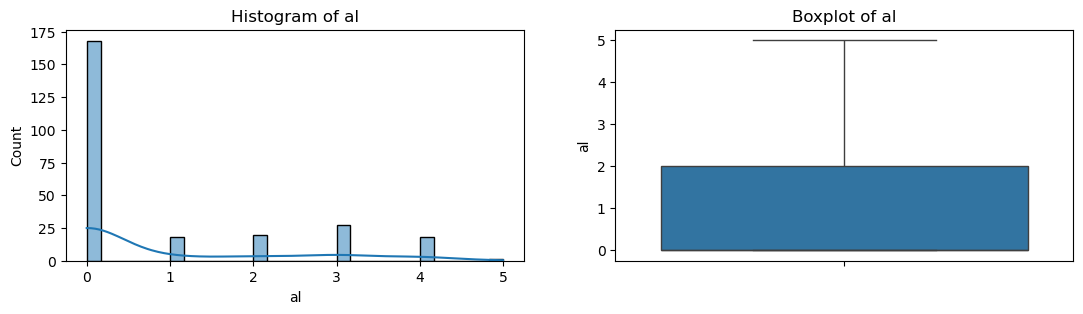

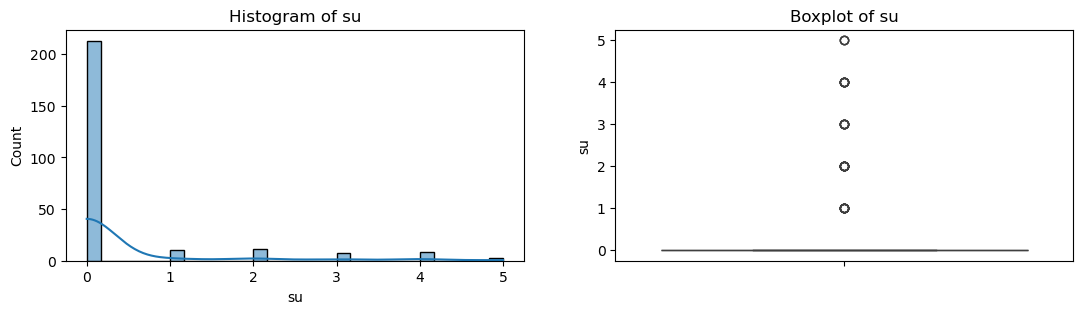

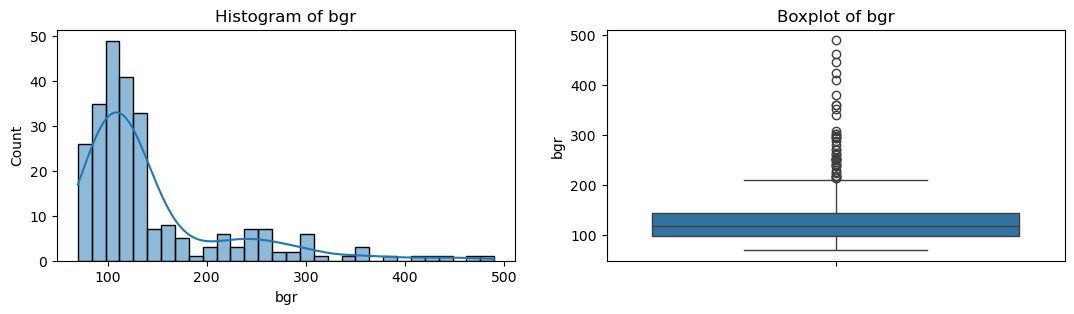

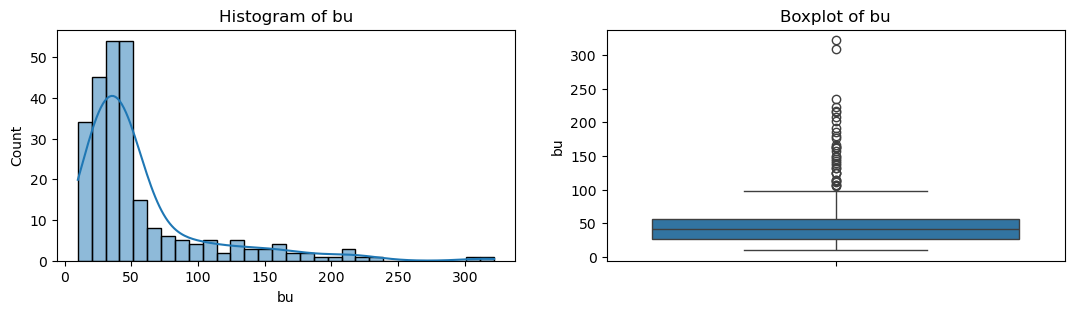

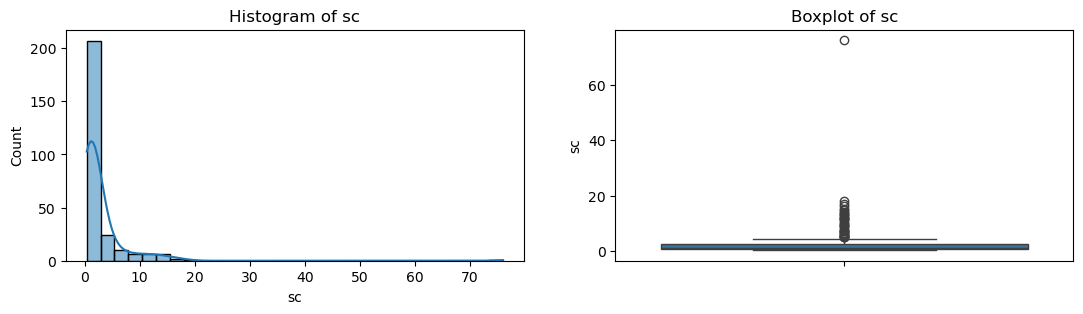

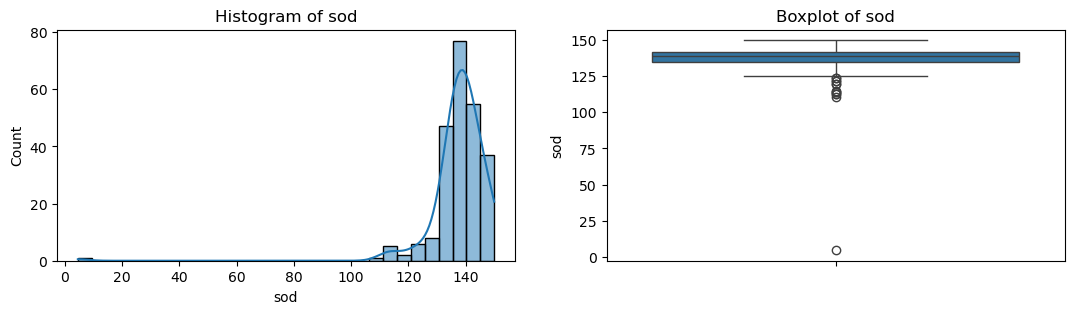

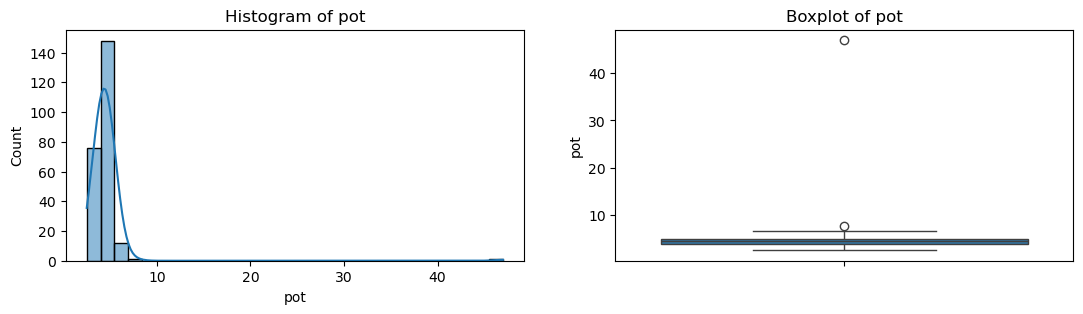

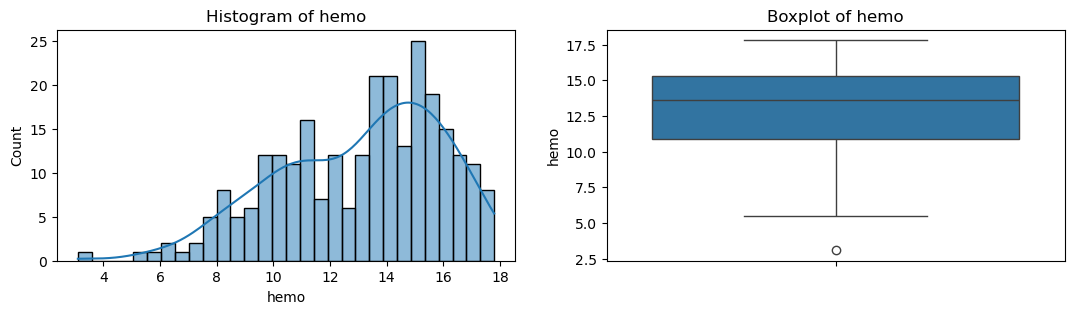

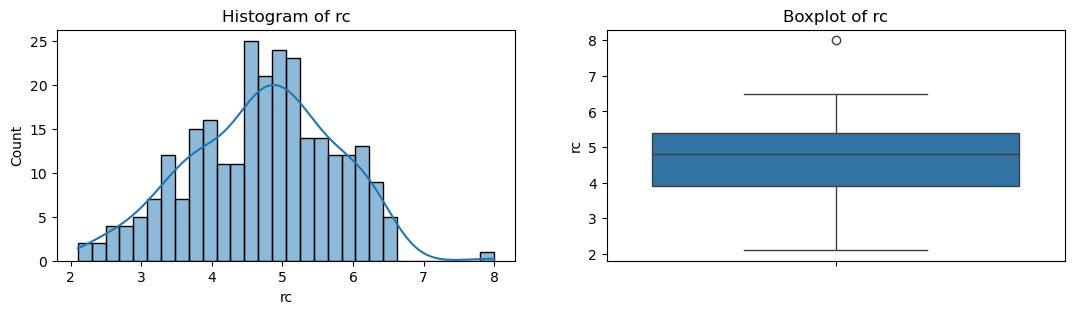

In [7]:
#----------------------------------------------EDA (Exploratory Data analysis)------------------------------------------------

num_features = df.select_dtypes(include="number")

for col in num_features:
    plt.figure(figsize=(13, 3))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Histogram of {col}")

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

    plt.show()

[Text(0.5, 1.0, 'diabetes mellitus with classification')]

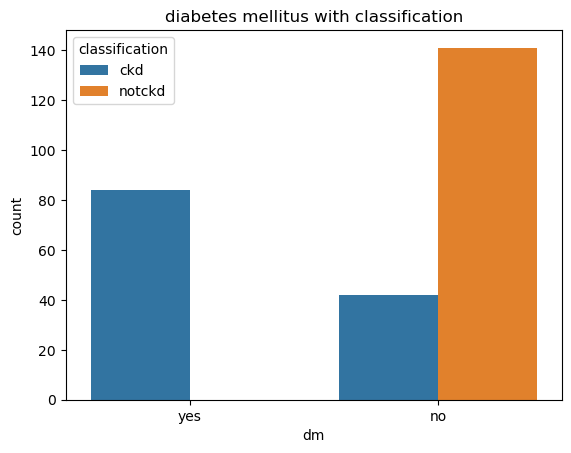

In [8]:
sns.countplot(data=df, x="dm", hue="classification").set(title="diabetes mellitus with classification")

[Text(0.5, 1.0, 'specific gravity with classification')]

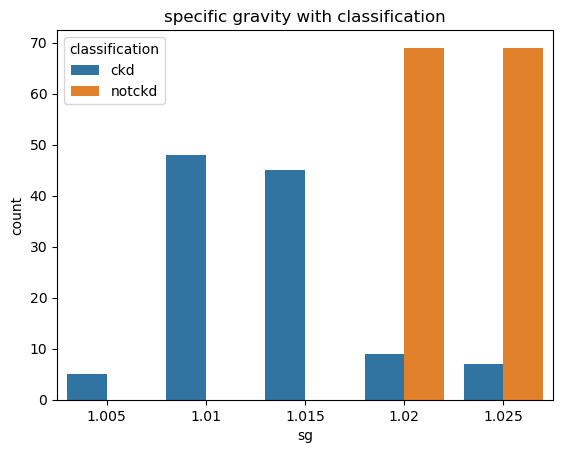

In [9]:
sns.countplot(data=df, x="sg", hue="classification").set(title="specific gravity with classification")

[Text(0.5, 1.0, 'albumin with classification')]

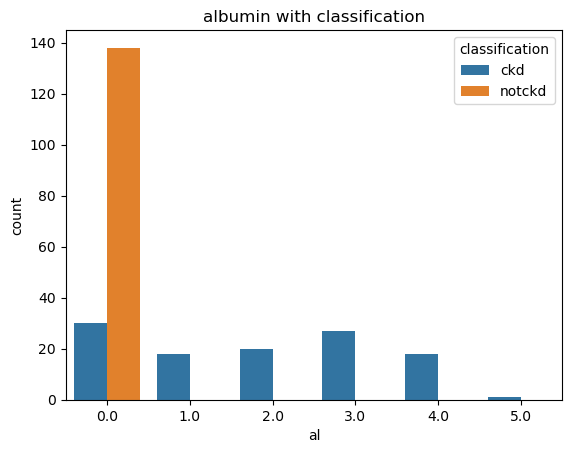

In [10]:
sns.countplot(data=df, x="al", hue="classification").set(title="albumin with classification")

[Text(0.5, 1.0, 'blood urea with classification')]

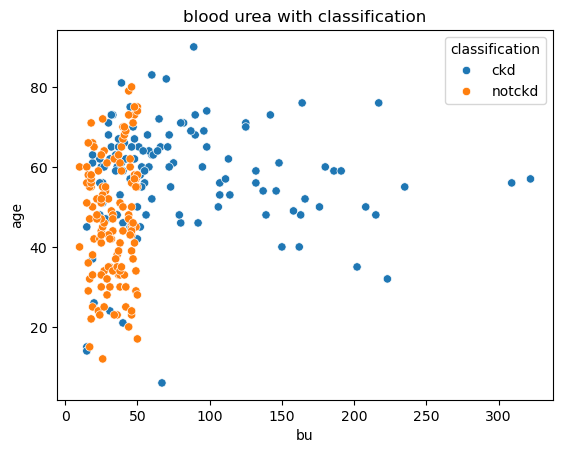

In [11]:
sns.scatterplot(data=df, x="bu", y="age", hue="classification").set(title="blood urea with classification")

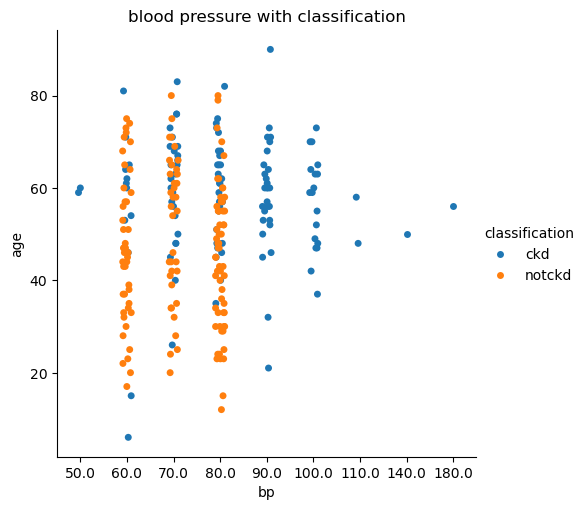

In [12]:
sns.catplot(data=df, x="bp", y="age", hue="classification").set(title="blood pressure with classification")

[Text(0.5, 1.0, 'serum creatinine with classification')]

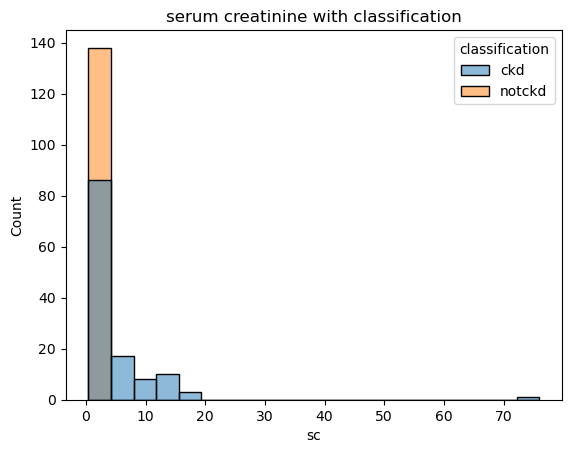

In [13]:
sns.histplot(data=df, x="sc", hue="classification", bins=20).set(title="serum creatinine with classification")

[Text(0.5, 1.0, 'sodium with classification')]

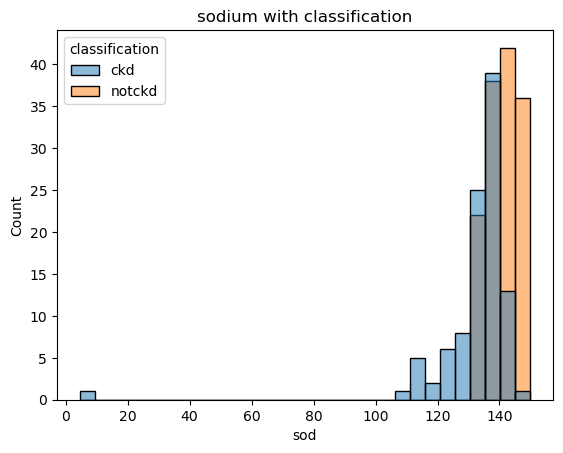

In [14]:
sns.histplot(data=df, x="sod", hue="classification",bins=30).set(title="sodium with classification")

[Text(0.5, 1.0, 'potasium with classification')]

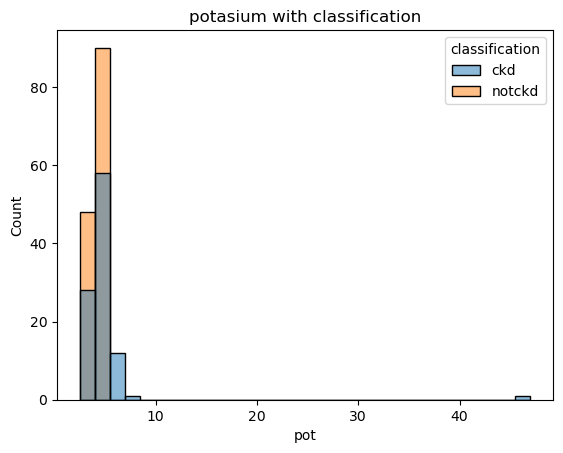

In [15]:
sns.histplot(data=df, x="pot", hue="classification",bins=30).set(title="potasium with classification")

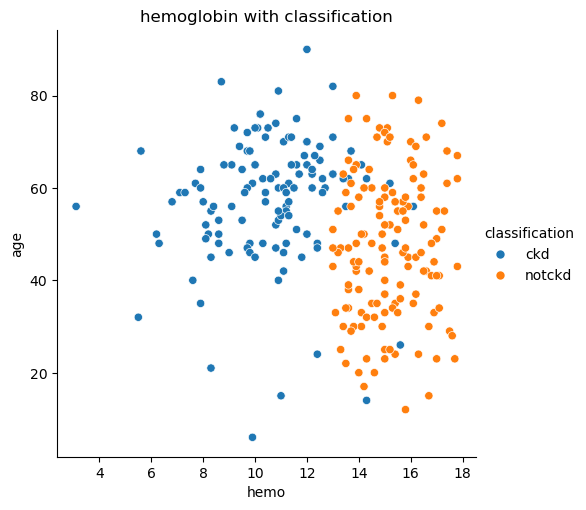

In [16]:
sns.relplot(data=df, x="hemo", y="age", hue="classification").set(title="hemoglobin with classification")

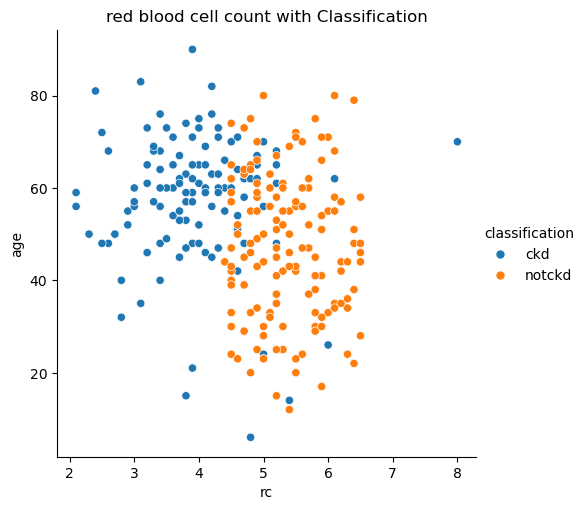

In [17]:
sns.relplot(data=df, x="rc", y="age", hue="classification").set(title="red blood cell count with Classification")

<AxesSubplot:>

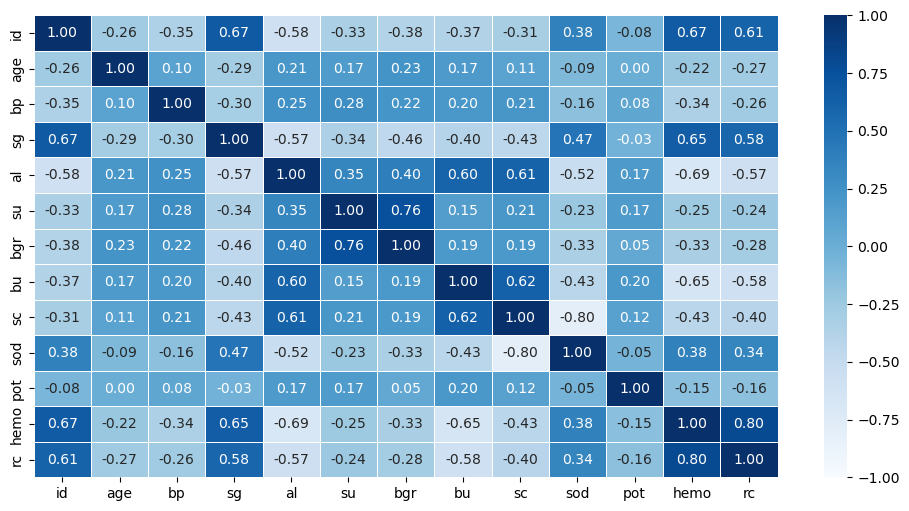

In [18]:
plt.figure(figsize=(12, 6))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap="Blues", fmt=".2f",vmin=-1, vmax=1, linewidths=0.5, linecolor="white")

In [19]:
#----------------------------------------------------data prproccessing------------------------------------------------------

#check data types :-
columns_to_change = df[["bp", "sg", "al", "bu", "sod", "pot", "hemo"]]

for col in columns_to_change:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [20]:
#handle nan values :-

cleaned_nan = df[["bp", "sg", "al", "bu", "sod", "pot", "hemo"]]

for i in cleaned_nan:
    df[i] = df[i].fillna(df[i].median())

In [21]:
#LabelEncodeing :-

LE = LabelEncoder()
df["dm"] = LE.fit_transform(df["dm"])

In [22]:
#outlier :-

q1 = df["sod"].quantile(0.25)
q3 = df["sod"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df["sod"] > lower_bound) & (df["sod"] < upper_bound)]


q1 = df["pot"].quantile(0.25)
q3 = df["pot"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df["pot"] > lower_bound) & (df["pot"] < upper_bound)]

In [23]:
#transformation :-

df["bp"] = np.log1p(df["bp"])

df["sod"] = np.log1p(df["sod"])

df["pot"] = np.log1p(df["pot"])

In [24]:
#feature selection :-

x = df[["bp", "sg", "al", "bu", "sod", "pot", "hemo", "dm"]]
y = df["classification"]

In [25]:
#train_test_split :-

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
model = LogisticRegression(max_iter=300)

In [27]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=300)

In [28]:
y_pred = model.predict(x_test)

In [29]:
#check metrics scores to evaluate :-

precision = precision_score(y_test, y_pred, pos_label="ckd")
recall = recall_score(y_test, y_pred, pos_label="ckd")
f1 = f1_score(y_test, y_pred, pos_label="ckd")
confusion = confusion_matrix(y_test, y_pred)

In [30]:
print(f"precision score : {precision:.2f} \nrecall score: {recall:.2f} \nf1 score : {f1:.2f}")
confusion

precision score : 1.00 
recall score: 0.95 
f1 score : 0.97


array([[19,  1],
       [ 0, 31]], dtype=int64)

In [31]:
#cross valid score :-

cv_scores = cross_val_score(model, x_train, y_train, cv=5)
print("Cross-validation mean score :", cv_scores.mean())

Cross-validation mean score : 0.9707317073170731


In [32]:
#dump and create file for model

joblib.dump(model, "kidney_model.pkl")
print("Model saved successfully!")

Model saved successfully!


In [33]:
# Predict on test dataset
y_pred = model.predict(x_test)

# Compute metrics
precision = precision_score(y_test, y_pred, pos_label="ckd")
recall = recall_score(y_test, y_pred, pos_label="ckd")
f1 = f1_score(y_test, y_pred, pos_label="ckd")

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 1.00
Recall: 0.95
F1 Score: 0.97
